In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

<AxesSubplot:xlabel='T2', ylabel='T6'>

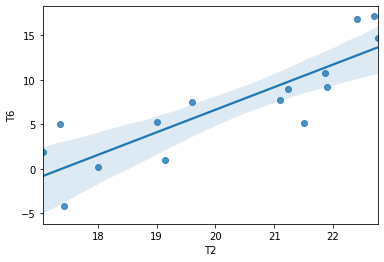

In [7]:
sns.regplot(x="T2",
            y="T6",
            data=simple_linear_reg_df)

In [8]:
model = LinearRegression()

In [9]:
data = df.loc[:, ['T2','T6']]

In [10]:
data.head(30)

,T2,T6
0,19.200000,7.026667
1,19.200000,6.833333
2,19.200000,6.560000
3,19.200000,6.433333
4,19.200000,6.366667
5,19.200000,6.300000
6,19.200000,6.263333
7,19.200000,6.190000
8,19.200000,6.123333
9,19.230000,6.190000


In [14]:
x =pd.DataFrame (df['T2'])
y= pd.DataFrame(df['T6'])

In [15]:
model = LinearRegression()

In [16]:
model = LinearRegression().fit(x, y)

In [17]:
r_sq = model.score(x, y)
print(round(r_sq,2))

0.64


In [18]:
df.drop(["date", "lights"], axis='columns', inplace = True)

In [19]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [23]:
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [27]:
features_df = normalised_df.drop(columns = ['T2', 'T6'])
Appliances_target = normalised_df['Appliances']

In [28]:
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [29]:
Appliances_target

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [51]:
features_df

,Appliances,T1,RH_1,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [30]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features_df,Appliances_target,test_size = 0.33, random_state=42)

In [59]:
linear_model = LinearRegression()

In [61]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [62]:
y_train

11553    0.037383
6580     0.317757
4130     0.168224
9812     0.084112
18178    0.028037
           ...   
11284    0.046729
11964    0.102804
5390     0.018692
860      0.065421
15795    0.112150
Name: Appliances, Length: 13222, dtype: float64

In [63]:
# Obtain predictions
predicted_values = model.predict(x_test)

In [64]:
from sklearn.metrics import mean_absolute_error

In [66]:
# Mean absolute error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,2)

0.0

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
# rmse
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.0

In [69]:
# rss
rss = np.sum(np.square(y_test - predicted_values))
round(rss,3)

0.0

In [70]:
from sklearn.metrics import r2_score
r2_score =r2_score(y_test, predicted_values)
round(r2_score,2)

1.0

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [72]:
# Lasso L1 regularisation
from sklearn.linear_model import Lasso

In [73]:
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [74]:

def get_weights_df(model, feat, col_name):
    #     returns the weight of all features
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns =['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [82]:
linear_model_weights = get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train,'Ridge_Weight')
lasso_weights_df =  get_weights_df(lasso_reg, x_train,'Lasso_Weight')
feature_weights = pd.merge(linear_model_weights,ridge_weights_df, on='Features')
feature_weights = pd.merge(final_weights,lasso_weights_df, on='Features')

In [83]:
feature_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight_x,Lasso_Weight_y
0,Windspeed,-2.692855e-16,0.000162,0.000000,0.000000
1,T7,-1.805524e-16,0.000056,0.000000,0.000000
2,RH_7,-1.774574e-16,-0.000221,-0.000000,-0.000000
3,Tdewpoint,-1.683842e-16,0.000320,0.000000,0.000000
4,T_out,-1.648294e-16,-0.000293,0.000000,0.000000
5,T5,-1.107096e-16,-0.000181,0.000000,0.000000
6,RH_out,-1.018734e-16,-0.000137,-0.000000,-0.000000
7,RH_8,-9.643270e-17,-0.000756,-0.000000,-0.000000
8,RH_9,-9.297877e-17,-0.000199,-0.000000,-0.000000
9,RH_5,-8.836756e-17,0.000074,0.000000,0.000000


In [77]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.0